In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

train = pd.read_csv("data/train_data.csv")
test = pd.read_csv("data/test_data.csv")

### Defining used columns and target classes

In [2]:
features = ['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
            'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
            'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol',
            'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'urine_protein',
            'serum_creatinine', 'ast', 'alt', 'gtp', 'dental_caries', 'tartar',
            'bmi', 'healthy_weight', 'eyesight_total', 'vision', 'hearing_impairment']
classNames=["not smoking","smoking"]
Y_train = train["smoking"]
X_train = train[features]
Y_test = test["smoking"]
X_test = test[features]
X_train

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,ast,alt,gtp,dental_caries,tartar,bmi,healthy_weight,eyesight_total,vision,hearing_impairment
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,35.0,53.0,61.0,1,1,25.95,1.0,2.0,1,0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,40.0,47.0,44.0,0,1,29.41,1.0,2.4,1,0
2,0,45,150,60,81.2,0.6,0.5,1.0,1.0,121.0,...,33.0,57.0,36.0,0,1,26.67,1.0,1.1,1,0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,43.0,52.0,61.0,0,1,25.39,1.0,2.2,1,0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,15.0,16.0,31.0,0,1,24.69,0.0,2.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0,40,170,75,84.0,0.1,0.2,1.0,1.0,116.0,...,33.0,43.0,46.0,0,0,25.95,1.0,0.3,3,0
44549,1,40,175,65,80.0,1.2,1.0,1.0,1.0,136.0,...,21.0,22.0,26.0,0,0,21.22,0.0,2.2,1,0
44550,0,60,150,50,77.0,0.9,0.9,1.0,1.0,108.0,...,24.0,23.0,25.0,1,1,22.22,0.0,1.8,1,0
44551,1,35,180,95,101.0,0.9,1.0,1.0,1.0,137.0,...,16.0,22.0,35.0,0,1,29.32,1.0,1.9,1,0


### Fitting our split data into the models
**In order to choose the best model, we used different algorithms with different parameters. For random forests we chose the number of trees to be 10 in the smaller one and 100 in the bigger one. For decision trees, we left one unlimited and for the other we limited tree depth to 3, to be able to visualise the tree.**

**We use random_state=1337 to have reproducible results**

In [3]:
forest_small = RandomForestClassifier(random_state=1337, n_estimators=10)
forest_small.fit(X_train, Y_train)
predictions_forest_small = forest_small.predict(X_test)

In [4]:
forest_big = RandomForestClassifier(random_state=1337, n_estimators = 100)
forest_big.fit(X_train, Y_train)
predictions_forest_big = forest_big.predict(X_test)

In [5]:
decision_tree_small = DecisionTreeClassifier(random_state=1337, max_depth = 3)
tree_small_model = decision_tree_small.fit(X_train, Y_train)
predictions_tree_small = tree_small_model.predict(X_test)

In [6]:
decision_tree_big = DecisionTreeClassifier(random_state=1337)
tree_big_model = decision_tree_big.fit(X_train, Y_train)
predictions_tree_big = tree_big_model.predict(X_test)

### Recall score
**As both false negatives and false positives are expensive for us according to the cost matrix, we chose F1 score as the metric we want to measure. We can see that the bigger random forest is by far the best performing model. Smaller forest is worse, closely followed by the big decision tree. The small tree is worse than the big tree, but the difference is not as big as in the case of forests.**

In [7]:
f1_forest_big = f1_score(Y_test, predictions_forest_big)
f1_forest_small = f1_score(Y_test, predictions_forest_small)
f1_tree_big = f1_score(Y_test, predictions_tree_big)
f1_tree_small = f1_score(Y_test, predictions_tree_small)
print(f1_forest_big,f1_forest_small,f1_tree_big,f1_tree_small)


0.7822328931572629 0.7222792607802875 0.7103033280117892 0.5948544698544699


### Setting parameters for plots

In [8]:
# Set the default text font size
plt.rc('font', size=30)
# Set the axes title font size
plt.rc('axes', titlesize=30)
# Set the axes labels font size
plt.rc('axes', labelsize=15)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=15)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=15)
# Set the legend font size
plt.rc('legend', fontsize=15)
# Set the font size of the figure title
plt.rc('figure', titlesize=15)
# Remove grid
plt.rcParams['axes.grid'] = False

### Plotting confusion matrices

Text(0.5, 1.0, 'Small tree')

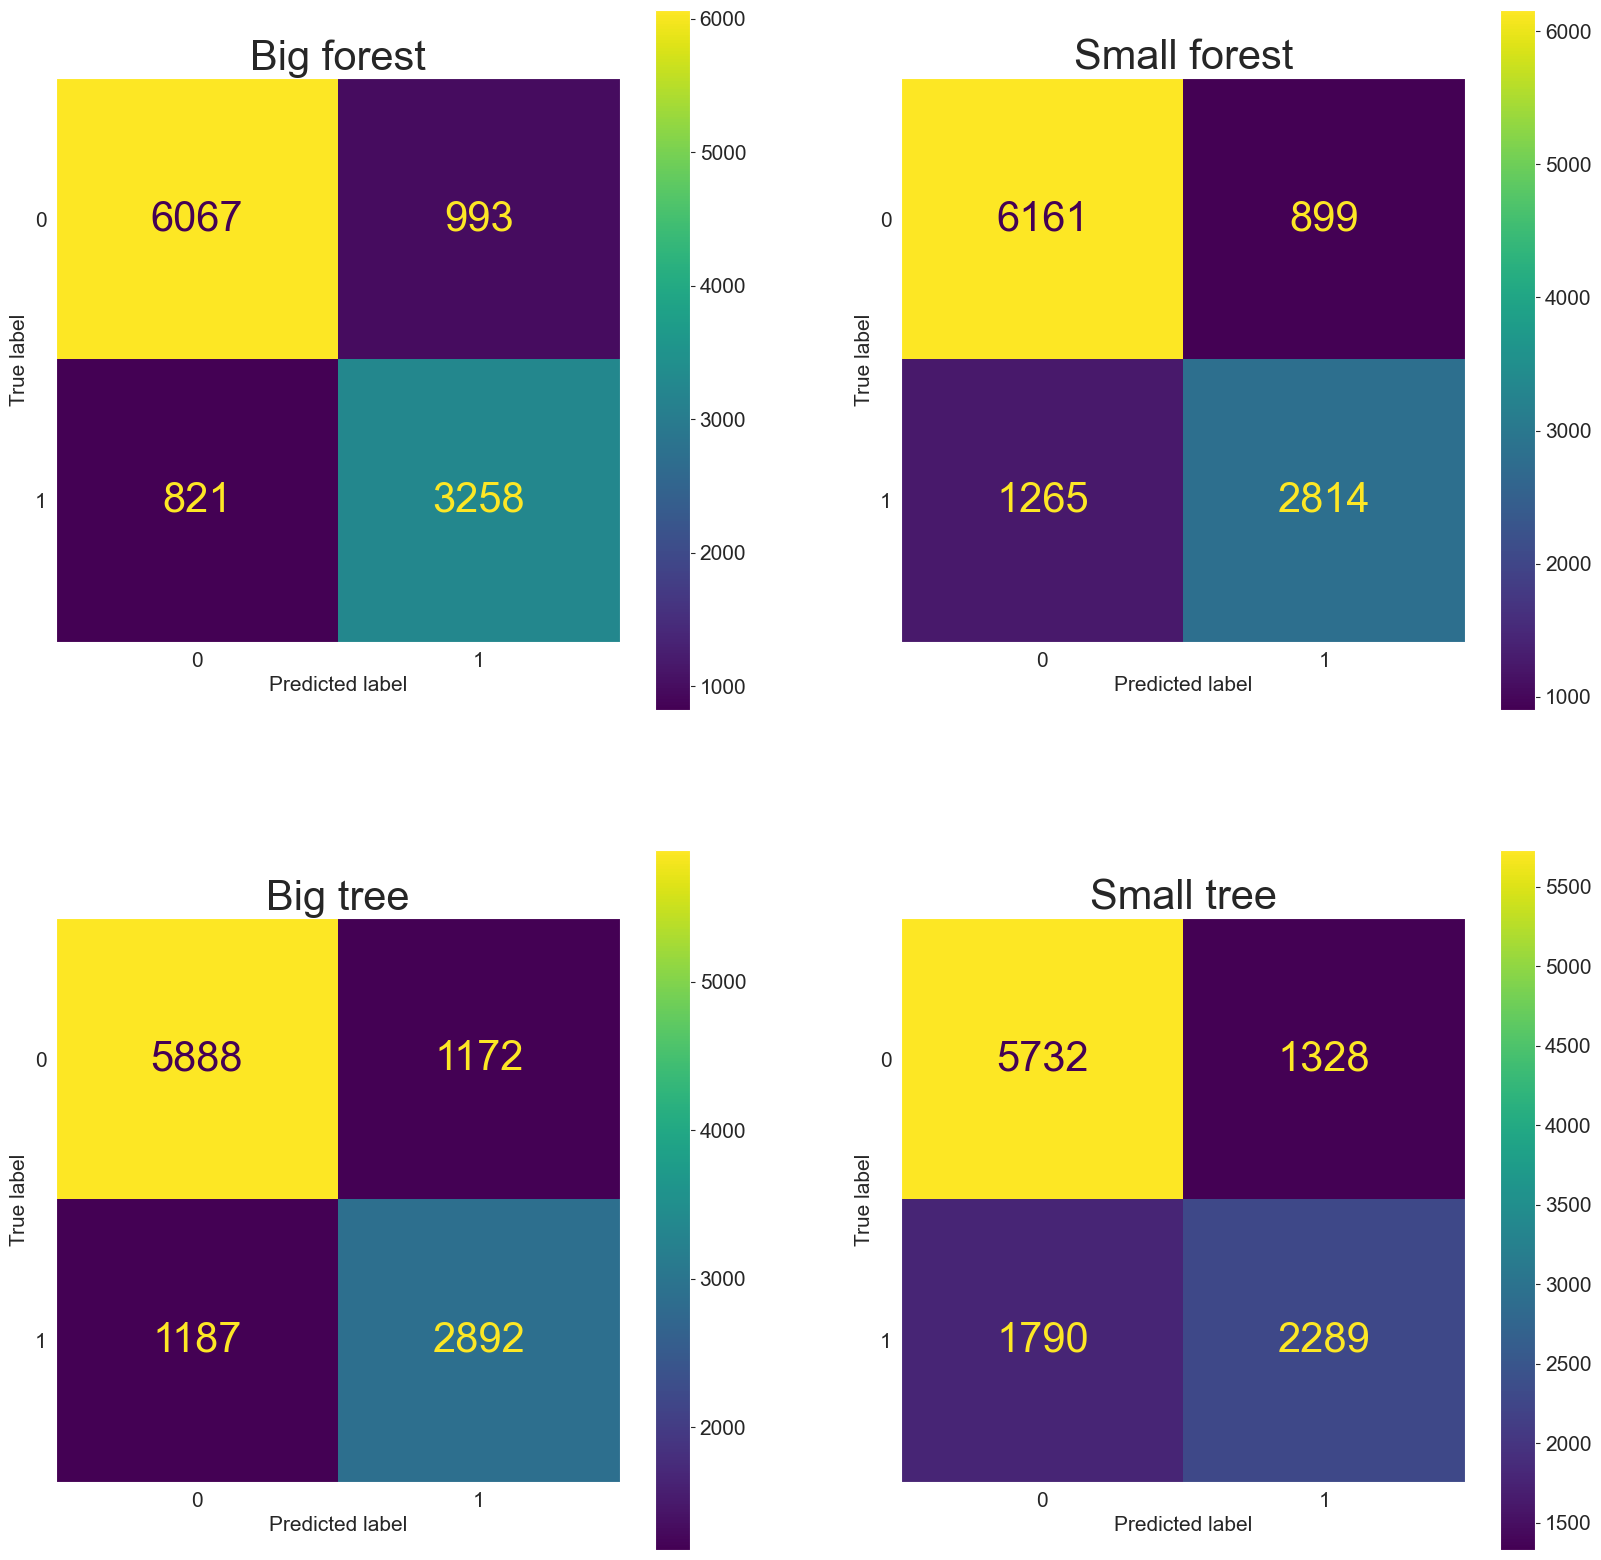

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
confmatrix1=confusion_matrix(Y_test, predictions_forest_big)
cm_display1 = ConfusionMatrixDisplay(confmatrix1).plot(ax=axs[0, 0])
axs[0, 0].set_title('Big forest')
confmatrix2=confusion_matrix(Y_test, predictions_forest_small)
cm_display2 = ConfusionMatrixDisplay(confmatrix2).plot(ax=axs[0, 1])
axs[0, 1].set_title('Small forest')
confmatrix3=confusion_matrix(Y_test, predictions_tree_big)
cm_display3 = ConfusionMatrixDisplay(confmatrix3).plot(ax=axs[1, 0])
axs[1, 0].set_title('Big tree')
confmatrix4=confusion_matrix(Y_test, predictions_tree_small)
cm_display4 = ConfusionMatrixDisplay(confmatrix4).plot(ax=axs[1, 1])
axs[1, 1].set_title('Small tree')


### Plotting confusion matrices multiplied by the cost matrix

In [10]:
costmatrix=[[20,-90],[-100,100]] #TN,FP,FN,TP

Text(0.5, 1.0, 'Small tree')

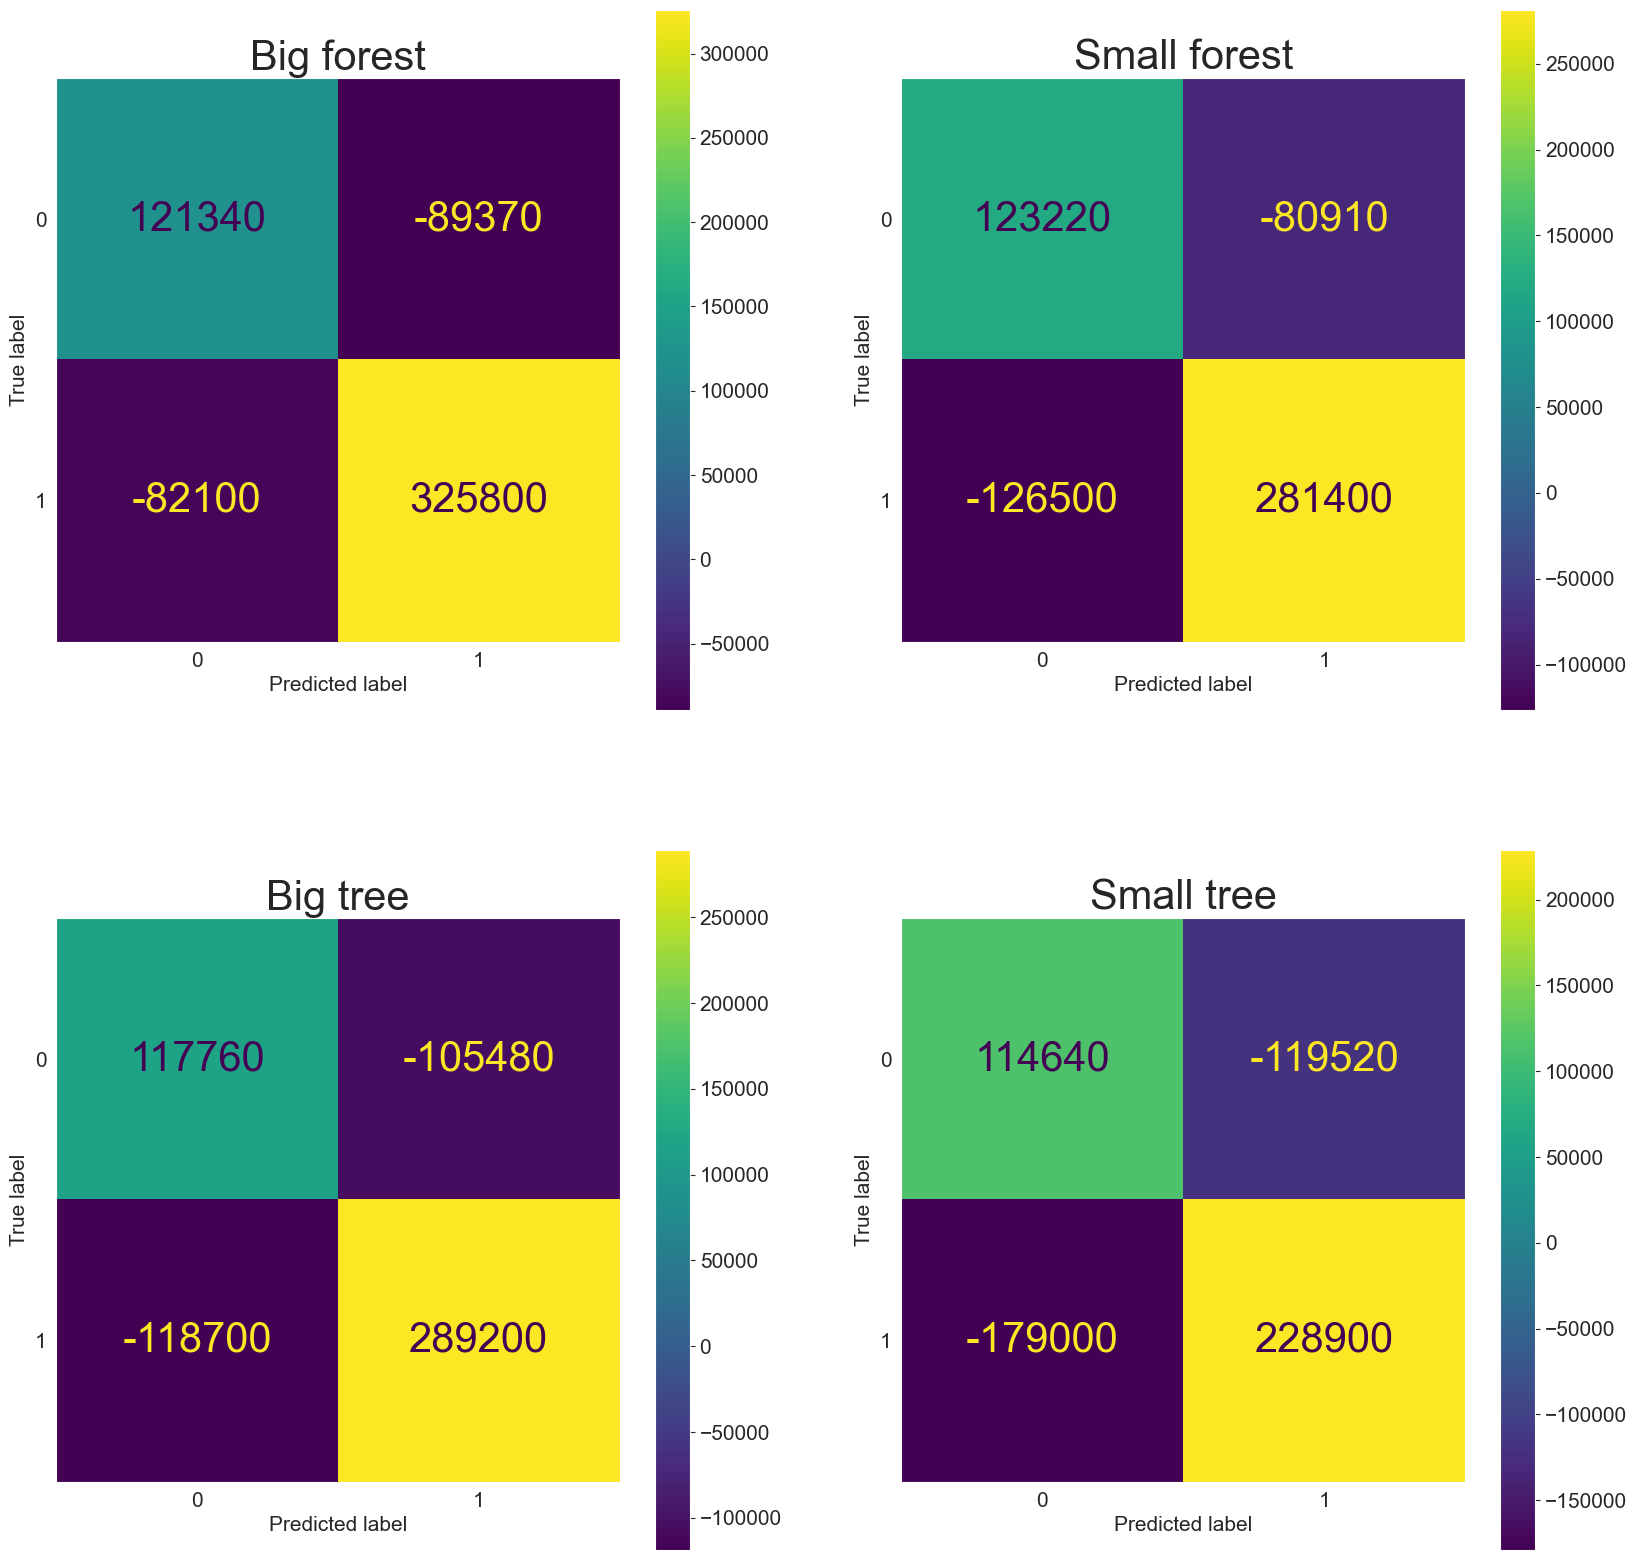

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
confmatrix1=confusion_matrix(Y_test, predictions_forest_big)*costmatrix
cm_display1 = ConfusionMatrixDisplay(confmatrix1).plot(ax=axs[0, 0])
axs[0, 0].set_title('Big forest')
confmatrix2=confusion_matrix(Y_test, predictions_forest_small)*costmatrix
cm_display2 = ConfusionMatrixDisplay(confmatrix2).plot(ax=axs[0, 1])
axs[0, 1].set_title('Small forest')
confmatrix3=confusion_matrix(Y_test, predictions_tree_big)*costmatrix
cm_display3 = ConfusionMatrixDisplay(confmatrix3).plot(ax=axs[1, 0])
axs[1, 0].set_title('Big tree')
confmatrix4=(confusion_matrix(Y_test, predictions_tree_small)*costmatrix)
cm_display4 = ConfusionMatrixDisplay(confmatrix4).plot(ax=axs[1, 1], values_format='')
axs[1, 1].set_title('Small tree')

### Total cost for each model

In [12]:
cost1=confmatrix1.sum()
cost2=confmatrix2.sum()
cost3=confmatrix3.sum()
cost4=confmatrix4.sum()
print(cost1,cost2,cost3,cost4)

275670 197210 182780 45020


### Visualization of the smaller tree

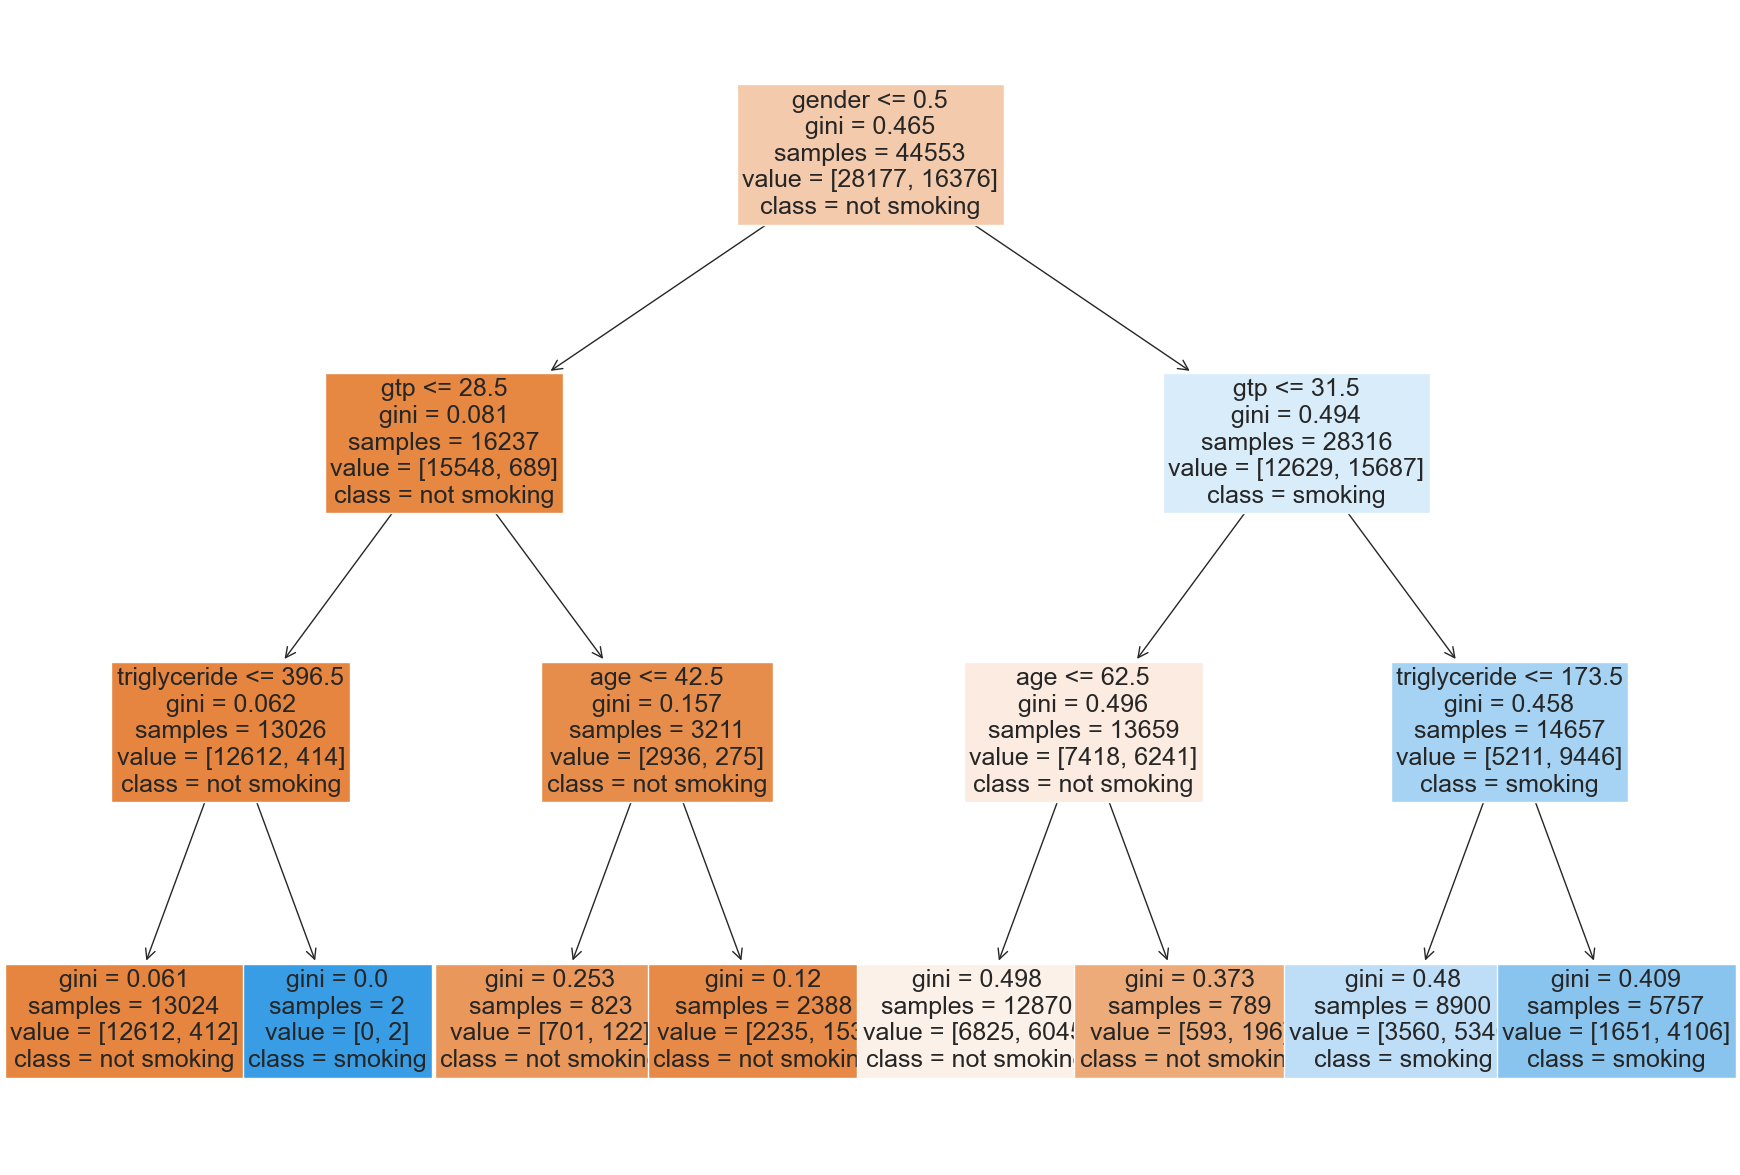

In [13]:
plt.figure(figsize=(22,15))
plot_tree(tree_small_model,feature_names = features,
          class_names=classNames,
          filled = True,fontsize=18)
plt.savefig('decisionTree.png')

### Prediction probabilities for our chosen instance
**As the chosen person does not smoke, we only want the probability of value 0**

In [14]:
instance=X_train.loc[[527]]
pred1 = forest_big.predict_proba(instance)
pred2 = forest_small.predict_proba(instance)
pred3 = decision_tree_big.predict_proba(instance)
pred4 = decision_tree_small.predict_proba(instance)
print(pred1[0][0],pred2[0][0],pred3[0][0],pred4[0][0])

0.84 0.9 1.0 0.5303030303030303


### Saving data to a datafame for better looking output

In [15]:
performance = pd.DataFrame()
performance['Model'] = ['Big forest','Small forest','Big tree','Small tree']
performance['F1 score'] = [f1_forest_big,f1_forest_small,f1_tree_big,f1_tree_small]
performance['Cost'] = [cost1,cost2,cost3,cost4]
performance['Probability'] = [pred1[0][0],pred2[0][0],pred3[0][0],pred4[0][0]]
performance

,Model,F1 score,Cost,Probability
0,Big forest,0.782233,275670,0.840000
1,Small forest,0.722279,197210,0.900000
2,Big tree,0.710303,182780,1.000000
3,Small tree,0.594854,45020,0.530303
